<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <a href="http://bokeh.pydata.org/">     
           <img 
               src="assets/bokeh-transparent.png" 
               style="width:50px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>10. Exporting and Embedding</h2></div>

So far we have seen how to generate interactive Bokeh output directly inline in Jupyter notbeooks. It also possible to embed interactive Bokeh plots and layouts in other contexts, such as standalone HTML files, or Jinja templates. Additionally, Bokeh can export plots to static (non-interactive) PNG and SVG formats. 

We will look at all of these possibilities in this chapter. First we make the usual imports.

In [1]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

And also load some data that will be used throughout this chapter

In [2]:
import pandas as pd

from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL

df = pd.DataFrame(AAPL)
df['date'] = pd.to_datetime(df['date'])

# Embedding Interactive Content

To start we will look differnet ways of embedding live interactive Bokeh output in various situations. 

## Displaying in the Notebook

The first way to embed Bokeh output is in the Jupyter Notebooks, as we have already, seen. As a reminder, the cell below will generate a plot inline as output, because we executed `output_notebook` above.

In [3]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

show(p)

## Saving to an HTML File

It is also often useful to generate a standalone HTML script containing Bokeh content. This is accomplished by calling the `output_file(...)` function. It is especially common to do this from standard Python scripts, but here we see that it works in the notebook as well. 

In [4]:
from bokeh.io import output_file, show

In [5]:
output_file("plot.html")

In [6]:
show(p)   # save(p) will save without opening a new browser tab

In addition the inline plot above, you should also have seen a new browser tab open with the contents of the newly saved "plot.html" file. It is important to note that `output_file` initiates a *persistent mode of operation*. That is, all subsequent calls to show will generate output to the specified file. We can "reset" where output will go by calling `reset_output`:

In [7]:
from bokeh.io import reset_output
reset_output()

## Templating in HTML Documents

Another use case is to embed Bokeh content in a Jinja HTML template. We will look at a simple explicit case first, and then see how this technique might be used in a web app framework such as Flask. 

The simplest way to embed standalone (i.e. not Bokeh server) content is to use the `components` function. This function takes a Bokeh object, and returns a `<script>` tag and `<div>` tag that can be put in any HTML tempate. The script will eecute and load the Bokeh content into the associated div. 

The cells below show a complete example, including loading BokehJS JS and CSS resources in the temlpate.

In [8]:
import jinja2
from bokeh.embed import components

# IMPORTANT NOTE!! The version of BokehJS loaded in the template should match 
# the version of Bokeh installed locally.

template = jinja2.Template("""
<!DOCTYPE html>
<html lang="en-US">

<link
    href="http://cdn.pydata.org/bokeh/dev/bokeh-0.13.0.min.css"
    rel="stylesheet" type="text/css"
>
<script 
    src="http://cdn.pydata.org/bokeh/dev/bokeh-0.13.0.min.js"
></script>

<body>

    <h1>Hello Bokeh!</h1>
    
    <p> Below is a simple plot of stock closing prices </p>
    
    {{ script }}
    
    {{ div }}

</body>

</html>
""")

In [9]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

script, div = components(p)

In [10]:
from IPython.display import HTML
HTML(template.render(script=script, div=div))

Note that it is possible to pass multiple objects to a single call to `components`, in order to template multiple Bokeh objects at once. See the [User's Guide for components](https://bokeh.pydata.org/en/latest/docs/user_guide/embed.html#components) for more information.


Once we have the script and div from `components`, it is straighforward to serve a rendered page containing Bokeh content in a web application, e.g. a Flask app as shown below.

In [11]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_bokeh():
   return template.render(script=script, div=div)

In [12]:
# Uncomment to run the Flask Server. Use Kernel -> Interrupt from Notebook menubar to stop 
#app.run(port=5050)

In [13]:
# EXERCISE: Create your own template (or modify the one above) 


# Exporting Static Images

Sometimes it is desirable to produce static images of plots or other Bokeh output, without any interactive capabilities. Bokeh supports exports to PNG and SVG formats. 

## PNG Export

Bokeh supports exporting a plot or layout to PNG image format with the `export_png` function. This function is alled with a Bokeh object to export, and a filename to write the PNG output to. Often the Bokeh object passed to `export_png` is a single plot, but it need not be. If a layout is exported, the entire lahyout is saved to one PNG image. 

***Important Note:*** *the PNG export capability requires installing some additional optional dependencies. The simplest way to obtain them is via conda:*

    conda install selenium phantomjs pillow


In [14]:
from bokeh.io import export_png

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.line(df['date'], df['close'], color='navy', alpha=0.5)

export_png(p, filename="plot.png")

'C:\\Users\\onno__000\\Documents\\04_mamba\\03_cursusmateriaal\\course-material\\Exercise_notebooks\\On_topic\\19-bokeh\\plot.png'

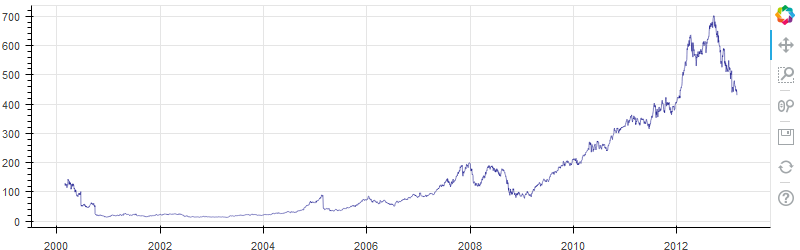

In [15]:
from IPython.display import Image
Image('plot.png')

In [16]:
# EXERCISE: Save a layout of plots (e.g. row or column) as SVG and see what happens 


## SVG Export

Bokeh can also generate SVG output in the browser, instead of rendering to HTML canvas. This is accomplished by setting `output_backend='svg'` on a figure. This can be be used to generate SVGs in `output_file` HTML files, or in content emebdded with `components`. It can also be used with the `export_svgs` function to save `.svg` files. Note that an SVG is created for *each canvas*. It is not possible to capture entire layouts or widgets in SVG output. 

***Important Note:*** *There a currently some known issue with SVG output, it may not work for all use-cases*

In [17]:
from bokeh.io import export_svgs

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime", output_backend='svg')
p.line(df['date'], df['close'], color='navy', alpha=0.5)

export_svgs(p, filename="plot.svg")

['plot.svg']

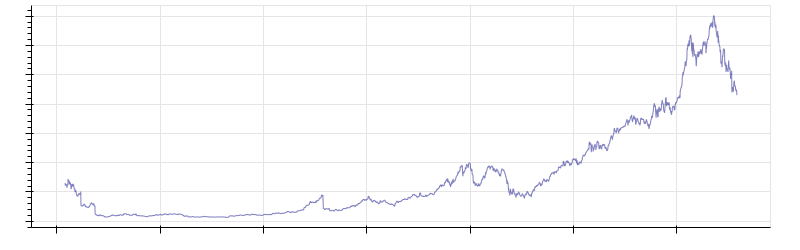

In [18]:
from IPython.display import SVG
SVG('plot.svg')

In [19]:
# EXERCISE: Save a layout of plots (e.g. row or column) as SVG and see what happens 
